# 1. The PageRank algorithm

Problem 1

In [1]:
with open('./matrix.txt', 'r') as myfile:
    for line in myfile:
        print(str(line))

From Node	To Node

0	7

1	0

3	0

3	2

3	6

4	0

4	5

4	6

5	0

5	6

6	0

7	0


In [2]:
line = '0\t4\n'
line.strip().split()

['0', '4']

In [3]:
import numpy as np
import scipy.linalg as la
def adjacency(filename, N):
    adj = np.zeros((N,N))
    with open(filename, 'r') as myfile:
        i = 0
        for line in myfile:
            if i > 0:
                line = line.strip().split()
                adj[int(line[0]),int(line[1])] = 1
            i += 1
    return adj

In [4]:
A = adjacency('./matrix.txt',8)

In [5]:
A

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

Problem 2

In [6]:
def Kmat(A):
    n = A.shape[0]
    for i in range(n):
        if sum(A.T[:,i]) == 0:
            A[i,:] = np.ones((1,n))
    D = np.diag(sum(A.T))
    D = la.inv(D)
    K = (D @ A).T
    return K

In [7]:
Kmat(A)

array([[ 0.        ,  1.        ,  0.125     ,  0.33333333,  0.33333333,
         0.5       ,  1.        ,  1.        ],
       [ 0.        ,  0.        ,  0.125     ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.125     ,  0.33333333,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.125     ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.125     ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.125     ,  0.        ,  0.33333333,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.125     ,  0.33333333,  0.33333333,
         0.5       ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.125     ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

Problem 3

In [8]:
import numpy as np
def steadyState(A, N = None, d = 0.85, tol = 1e-5 ):
    import numpy as np
    if N != None:
        A = A[:N,:N]
    n = A.shape[0]
    K = Kmat(A)
    I = np.eye(n)
    E = np.ones((n,n))
    B = d * K + (1-d)/n * E
    
    #p = np.ones((1,n)).T/n
    p = np.eye(n)[0,].T
    dist = 10
    i = 1
    while dist > tol:
        #print(p)
        np = B @ p
        dist = abs(la.norm(np - p))
        p = np
        i +=1
    print('Number of iterations: ' + str(i))
    return p
        
        

In [9]:
steadyState(A)

Number of iterations: 75


array([ 0.43869593,  0.02171029,  0.02786154,  0.02171029,  0.02171029,
        0.02786154,  0.04585394,  0.39459619])

Problem 4

In [10]:
def steadyState_2(A, N = None, d = 0.85):
    import numpy as np
    if N != None:
        A = A[:N,:N]
    n = A.shape[0]
    K = Kmat(A)
    I = np.eye(n)
    E = np.ones((n,n))
    B = d * K + (1-d)/n * E
    
    m,n = np.shape(A)
    evals, evecs = la.eig(np.dot(np.conjugate(A).T, A))
    ind = evals.argsort()[::-1]
    evals = evals[ind]
    evecs = evecs[ind]
    p = la.solve(I-d*K, ((1-d)/n)*np.ones(n))
    return p
   
        

In [11]:
steadyState_2(A)

array([ 0.43869288,  0.02171029,  0.02786154,  0.02171029,  0.02171029,
        0.02786154,  0.04585394,  0.39459924])

Problem 5 

In [1]:

with open('./ncaa2013.csv', 'r') as ncaafile:
    ncaafile.readline()
    for line in ncaafile:
        teams = line.strip().split(',')
        
        #print(teams)

In [13]:
import pandas as pd
import numpy as np
matches = pd.read_csv('./ncaa2013.csv').as_matrix()
m, n = matches.shape
names, index = np.unique(matches, return_inverse = True)
index = index.reshape((m, n))

k = len(names)
A = np.zeros((k,k))

for i in range(m):
    #print((index[i, 0],index[i, 1]))
    #A[index[i, 0], index[i, 1]] = 1
    A[index[i, 1], index[i, 0]] = 1

ranks = steadyState(A, d = 0.7, tol = 1e-6)

ranks = names[np.argsort(ranks)[::-1]]

print('Top 5 teams in order:')
for i in range(5):
    print(ranks[i])

Number of iterations: 22
Top 5 teams in order:
Duke
Butler
Louisville
Illinois
Indiana


# Lab 2: Conditioning and Stability

Problem 1

In [14]:
def condNum(A):
    svals = la.svd(A)[1]
    sval1 = max(svals)
    svaln = min(svals)
    condnum = sval1/svaln
    return condnum

A = np.random.random((4,4))
print(condNum(A))
print(np.linalg.cond(A))

Q = la.qr(A)[0]
print(condNum(Q))

625.270162601
625.270162601
1.0


Problem 2

Approximate Absolute Condition Number: 3.43474005362824e-8
Approximate Relative Condition Number: 23706163258.2456


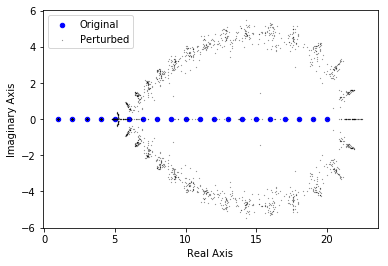

In [15]:
import sympy as sy
from matplotlib import pyplot as plt

# The roots of w are 1, 2, ..., 20.
w_roots = np.arange(1, 21)

# Get the exact Wilkinson polynomial coefficients using SymPy.
x, i = sy.symbols('x i')
w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
w_coeffs = np.array(w.all_coeffs())



plt.scatter(w_roots.real,w_roots.imag,
            c='b', marker='o',s=20, label = "Original")


maxacn = 0
maxrcn = 0
for i in range(100):
    r = np.random.normal(1, 1e-10, 21)
    new_coeffs = w_coeffs*r
    new_roots = np.roots(np.poly1d(new_coeffs))
    
    if i == 99:
        plt.scatter(new_roots.real,new_roots.imag,
                    c='k',marker='.', s = 0.1, label = 'Perturbed')
    else:
        plt.scatter(new_roots.real,new_roots.imag,
                    c='k',marker='.', s = 0.1)
    
    abscn = la.norm(new_roots - w_roots,
                    np.inf) / la.norm(new_coeffs - w_coeffs, np.inf)
    if abscn > maxacn:
        maxacn = abscn
        
    relcn = abscn * la.norm(w_coeffs,
                            np.inf) / la.norm(w_roots, np.inf)
    
    if relcn > maxrcn:
        maxrcn = relcn
        
print("Approximate Absolute Condition Number: " + str(maxacn))
print("Approximate Relative Condition Number: " + str(maxrcn))  


plt.xlabel("Real Axis")
plt.ylabel("Imaginary Axis")
plt.legend(loc = 'upper left')
plt.show()



Problem 3

In [16]:
def evalcond(A):
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j*imags
    lambda_old = la.eigvals(A)
    A_tilde = A + H
    lambda_new = la.eigvals(A_tilde)
    # acn
    k_tilde = la.norm(lambda_old - lambda_new, 2)/la.norm(H, 2)
    # rcn
    k = (la.norm(A, 2)/la.norm(lambda_old, 2))*k_tilde
    return k_tilde, k

Problem 4

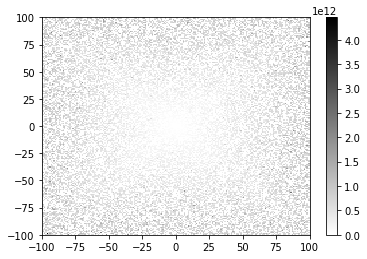

In [17]:
def condgrid(bounds, res):
    
    x_min, x_max, y_min, y_max = bounds
    xvals = np.linspace(x_min, x_max, res)
    yvals = np.linspace(y_min, y_max, res)
    condNums = np.zeros((res, res))
    for i in range(res):
        for j in range(res):
            A = np.array([[1,xvals[i]],[yvals[j],1]])
            condNums[i,j] = evalcond(A)[1]
    plt.pcolormesh(xvals, yvals, condNums, cmap='gray_r')
    plt.colorbar()
    plt.show()
    
condgrid([-100,100,-100,100],200)

Problem 5

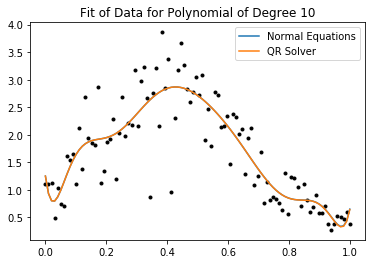

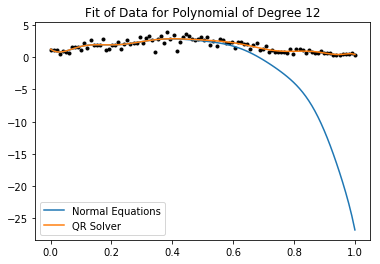

In [18]:
def condpolyfit(n):
    xk, yk = np.load('stability_data.npy').T
    A = np.vander(xk, n+1)
    
    # la.inv
    ck_inv = la.inv(A.T @ A) @ A.T @ yk
    ferror_Inv = np.linalg.norm(A @ ck_inv - yk)
    
    # QR decomp
    Q , R = la.qr(A, mode='economic')
    ck_QR = la.solve_triangular(R, Q.T @ yk)
    ferror_QR = np.linalg.norm(A @ ck_QR - yk)
    
    plt.plot(xk, yk, ".k")
    plt.plot(xk, np.polyval(ck_inv, xk), label="Normal Equations")
    plt.plot(xk, np.polyval(ck_QR, xk), label = "QR Solver")
    plt.legend()
    plt.title("Fit of Data for Polynomial of Degree " + str(n))
    plt.show()
    #return ferror_Inv, ferror_QR

condpolyfit(10)
condpolyfit(12)


We can see that for a polynomial fit of degree 10, the methods still produce the same result, but that for larger degrees, the QR method is more stable.

Problem 6

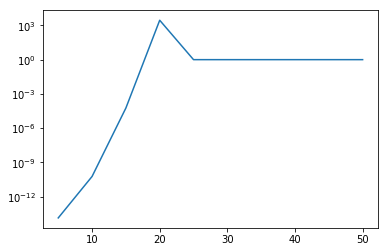

In [26]:

import math
ferror = []
x = sy.Symbol('x')

for n in np.arange(5,55,5):
    intn = int(n)
    # Integral 
    I_integral = float(sy.integrate((x**intn)*(sy.exp((x-1))), (x, 0, 1)))
    # Factorial formula
    I_formula = float((-1)**intn)*sy.subfactorial(intn)+ \
    ((-1)**(intn+1))*sy.factorial(intn)/math.e
    
    ferror.append(abs(-(I_formula-I_integral)/I_integral))

plt.plot(np.arange(5,55,5),ferror)
plt.yscale('log')

plt.show()


It seems that starting with n = 25, the factorial formula I is equal to zero (hence the forward error equal to 1).
The factorial values become so great, and of similar size, such that the actual difference in the factorial formula is rounded to zero.

# Numerical Differentiation

Problem 1

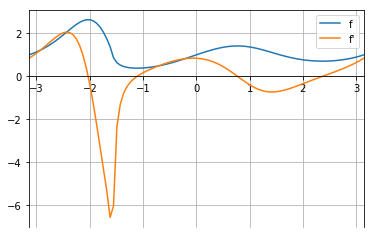

In [27]:
x = sy.Symbol('x')
f = (sy.sin(x) + 1)**(sy.sin(sy.cos(x)))
fp = sy.diff(f, x)
f = sy.lambdify(x, f, 'numpy')
fp = sy.lambdify(x, fp, 'numpy')

xvals = np.linspace(-np.pi, np.pi,100)

ax = plt.gca()
ax.spines["bottom"].set_position("zero")

ax.plot(xvals, f(xvals), label="f")
ax.plot(xvals, fp(xvals), label="f\'")
plt.xlim(-np.pi, np.pi)
plt.legend()
plt.grid()
plt.show()

Problem 2

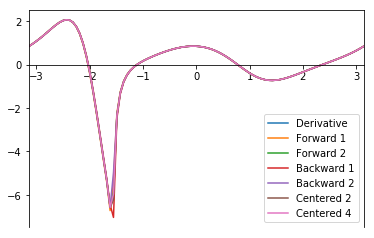

In [28]:
def forward_1(f, x, h):
    return (f(x + h) - f(x)) / h

def forward_2(f, x, h):
    return (-3 * f(x) + 4 * f(x + h) - f(x + 2 * h))/(2 * h)

def backward_1(f, x, h):
    return (f(x) - f(x - h))/h

def backward_2(f, x, h):
    return (3 * f(x) - 4 * f(x - h) + f(x - 2 * h))/(2 * h)

def centered_2(f, x, h):
    return (f(x + h) - f(x - h))/(2 * h)

def centered_4(f, x, h):
    return (f(x - 2 * h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h))/(12 * h)


ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.plot(xvals, fp(xvals), label="Derivative")
ax.plot(xvals, forward_1(f,xvals,0.01), label="Forward 1")
ax.plot(xvals, forward_2(f, xvals,0.01), label="Forward 2")
ax.plot(xvals, backward_1(f, xvals,0.01), label="Backward 1")
ax.plot(xvals, backward_2(f, xvals, 0.01), label="Backward 2")
ax.plot(xvals, centered_2(f, xvals, 0.01), label = "Centered 2")
ax.plot(xvals, centered_4(f, xvals, 0.01), label = "Centered 4")
plt.xlim(-np.pi, np.pi)
plt.legend(loc = 'lower right')
plt.show()

They all look like fairly decent approximations.
To compare, let's check the norm of the difference to the actual function:

In [29]:

functions = [forward_1, forward_2, backward_1, backward_2, centered_2, centered_4]
#Grid as before:

xvals = np.linspace(-np.pi, np.pi,100)

for g in functions:
    print(np.linalg.norm(fp(xvals)-g(f,xvals, h=0.01)))
    
print('For a different grid:')
      
xvals = np.linspace(-np.pi, np.pi,300)

for g in functions:
    print(np.linalg.norm(fp(xvals)-g(f,xvals, h=0.01)))

0.699765645035
0.164613875615
1.03575695162
1.07020854621
0.179705891601
0.0857458554292
For a different grid:
1.73437720596
0.946928765877
2.73573687892
3.82086826137
0.58373757629
0.910402139758


It seems that centered is more accurate than forward, which is more accurate than backward as a method.

Problem 3

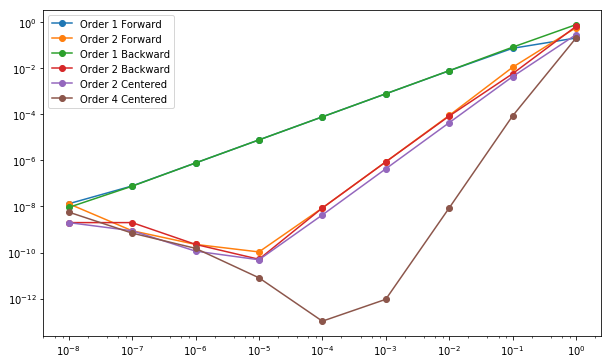

In [30]:
def derivError(x):
    xvals = np.logspace(-8,0,9)
    aerror = np.zeros((len(xvals), 6))
    for i in range(len(xvals)):
        for j in range(len(functions)):
            aerror[i,j] = abs(functions[j](f, x, xvals[i]) - fp(x))   
    plt.figure(figsize=(10,6))
    labels = ["Order 1 Forward", "Order 2 Forward",
              "Order 1 Backward", "Order 2 Backward",
              "Order 2 Centered", "Order 4 Centered"]
    for j in range(len(functions)):
        plt.loglog(xvals, aerror[:,j],
                   label = labels[j], marker = 'o')
    plt.legend(loc = 'upper left')
    plt.show()
    
derivError(1)

Problem 4

In [35]:
a = 500

plane = np.load('plane.npy')
alpha = np.deg2rad(plane[:, 1])
beta = np.deg2rad(plane[:, 2])

x = a * (np.tan(beta))/(np.tan(beta) - np.tan(alpha))
y = a * (np.tan(beta) * np.tan(alpha))/(np.tan(beta) - np.tan(alpha))

xyp = np.zeros((2, len(x)))
i = 0
for z in [x, y]:
    xyp[i,0] = np.array([z[1] - z[0]])
    xyp[i,1:-1] = (z[2:] - z[:-2])/2
    xyp[i,-1] = np.array([z[-1] - z[-2]])
    i += 1

print('The approximate speeds at times 7 to 14 are:')
print((xyp[0] ** 2 + xyp[1] ** 2) ** .5)



The approximate speeds at times 7 to 14 are:
[ 46.42420062  47.00103938  48.99880514  50.09944163  48.29035084
  51.56455905  53.92303355  51.51480057]


Problem 5

In [129]:
def myjacobian(f, x_0, h):
    n = np.shape(x_0)[0]
    m = np.shape(f(x_0))[0]
    J = np.zeros((m,n))
    I = np.eye(n)
    for i in range(m):
        for j in range(n):
            J[i, j] = (f(x_0 + h * I[:, j])[i] 
                       - f(x_0 - h * I[:, j])[i])/(2*h)
    return J


# test
def f(x):
    return np.array([x[0]**2, x[0]**3 - x[1]])
x_0 = np.array([1.,-1.])
myjacobian(f, x_0, 0.0001)

array([[ 2.        ,  0.        ],
       [ 3.00000001, -1.        ]])

The function is fairly accurate. The Jacobian is correct except for a small error in $J[1,0] \neq 3.$

Problem 6

In [135]:
import sympy as sy
from autograd import grad
import autograd.numpy as anp
import math
import time

x = sy.Symbol('x')
f = sy.log(sy.sqrt(sy.sin(sy.sqrt(x))))
x_0 = np.pi/4

start = time.time()
fp = sy.diff(f, x)
fp = sy.lambdify(x, fp,'numpy')
print(fp(x_0))
end = time.time()
print('sympy: '+ str(end - start))


f = lambda x: math.log(math.sqrt(math.sin(math.sqrt(x))))
x_0 = math.pi/4
start = time.time()
fpx_0 = centered_2(f, x_0, 0.00001)
fp = sy.lambdify(x, fp,'numpy')
print(fp(x_0))
end = time.time()
print('sympy: '+ str(end - start))

f = lambda x: anp.log(anp.sqrt(anp.sin(anp.sqrt(x))))
start = time.time()
grad_f = grad(f)
print(grad_f(x_0))
end = time.time()
print('autograd: '+ str(end - start))

0.230259011147
sympy: 0.0044820308685302734


SyntaxError: invalid syntax (<string>, line 1)

In [136]:
from autograd import grad
import autograd.numpy as anp 

# sympy
x = sy.symbols('x')
f = sy.log(sy.sqrt(sy.sin(sy.sqrt(x))))
x_0 = sy.pi/4
print("Sympy:")
%timeit fp = sy.diff(f,x)
print(str(float(fp.subs(x,x_0))))
print('\n')

# autograd
f = lambda x: anp.log(anp.sqrt(anp.sin(anp.sqrt(x))))
grad_f = grad(f)
x0 = anp.pi/4
print("Autograd:")
%timeit grad_f(x0)
print(grad_f(x0))
print("Error:" + str(float(abs(grad_f(x0)-fp.subs(x,x_0)))))
print('\n')

# centered
f = lambda x: math.log(math.sqrt(math.sin(math.sqrt(x))))
print("Second order centered difference quotient:")
%timeit centered_2(f,x_0,0.001)
print(centered_2(f,x_0,0.001))
print("Error:" + str(float(abs(centered_2(f,x_0,0.001)-fp.subs(x,x_0)))))

Sympy:
10000 loops, best of 3: 183 µs per loop


AttributeError: 'function' object has no attribute 'subs'

Not very sure why the centered method takes so long.

Problem 7

In [137]:
def taylor_sin(x, tol = 1e-8):
    result = 0
    cur_term = x
    i = 0
    while anp.abs(cur_term) >= tol:
# Autograd's version of NumPy doesn't have the math attribute so use NumPy.
        cur_term = ((-1)**(i))*x**(2*i+1)/np.math.factorial(2*i+1)
        result += cur_term
        i += 1
    return result

d_taylor_sin = grad(taylor_sin)
d_d_taylor_sin = grad(d_taylor_sin)

x = np.linspace(-math.pi,math.pi,100)
#f = np.sin(x)
fp = np.zeros(len(x))
fpp = np.zeros(len(x))
for i in range(len(x)):
    f[i] = taylor_sin(x[i])
    fp[i] = d_taylor_sin(x[i])
    fpp[i] = d_d_taylor_sin(x[i])

plt.plot(x,f,label="f(x) = sin(x)")
plt.plot(x,fp,label="f'(x)")
plt.plot(x,fpp,label="f''(x)")

plt.legend(loc = "lower center")
plt.show()

TypeError: 'log' object does not support item assignment

Problem 8

In [138]:
import math
from autograd import elementwise_grad
from autograd import jacobian
import sympy as sy

'''# sympy
x, y = sy.symbols('x y')
f = sy.Matrix([sy.exp(x) * sy.sin(y) + y**3, 3 * y - sy.cos(x)])
x_0 = sy.Matrix([x,y])
print("Sympy:")
%timeit f.jacobian(x_0)
J = f.jacobian(x_0)
output = sy.lambdify((x,y),J,'numpy')
print(output(1.,1.))
print("")

# autograd
f = lambda x: anp.array([anp.exp(x[0])*anp.sin(x[1])+(x[1])**3,3*x[1]-anp.cos(x[0])])
jacobian_f = jacobian(f)
print("Autograd:")
%timeit jacobian_f(anp.array([1.,1.]))
print(jacobian_f(anp.array([1.,1.])))
print("")'''
                    
#Second Order Center Method

f = lambda x: np.array([math.exp(x[0])*math.sin(x[1]) + (x[1])**3, 3*x[1]-math.cos(x[0])])
f1 = lambda x: np.array([math.exp(x[0])*math.sin(x[1]) + (x[1])**3])
f2 = lambda x: np.array([3*x[1]-math.cos(x[0])])
#f = [f1, f2]
#x_0 = np.array([1.,1.])
print("Second order centered:")
J = np.zeros((2,2))
def J(x_0):
    for i in range(2):
        for j in range(2):
            J = centered_2(f[j], 1, 0.001)
%timeit J(x_0)

print(J)


Second order centered:


TypeError: 'function' object is not subscriptable

In [128]:
jacobian2 = np.zeros((2,2))
jacobian2[:,0] =(f(np.array(([1.01, 1])) - f(np.array(([0.99,1]))))/ 0.02
print(jacobian2)


jacobian2[:,1] = (f(np.array((1,1.01))) - f(np.array((1,0.99))))/ 0.02

SyntaxError: invalid syntax (<ipython-input-128-4a7d365ea4ce>, line 3)

As expected

In [ ]:
Problem 1

In [ ]:
Problem 1

In [ ]:
Problem 1

In [ ]:
Problem 1

In [ ]:
Problem 1

In [ ]:
Problem 1

In [ ]:
Problem 1

In [ ]:
Problem 1

In [ ]:
Problem 1

In [ ]:
Problem 1

In [ ]:
Problem 1

In [ ]:
Problem 1

In [ ]:
Problem 1

In [ ]:
Problem 1

In [ ]:
Problem 1

In [ ]:
Problem 1

In [ ]:
Problem 1

In [ ]:
Problem 1

In [ ]:
Problem 1